# Cosmetics Recommendation System

This project is a cosmetics recommendation system based on the facial problems experienced.

| Feature Name | Description |
| --- | --- |
|**product_href** | Product URL link |
|**product_name** | Product name |
|**product_type** |Type of product (Face Moisturizer, Cleanser, Mask And Peel & Eye Cream ) |
|**brand** | Product brand |
|**notable_effects** | What it's good for |
|**skintype** | The suitable type of skin for the product (All, Normal, Oily, Combination, Dry, Sensitive) |
|**price** | Product price (in INR Rupees:Rs) |
|**description** | Product description |
|**picture_src** | Product image URL link |

# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import seaborn as sns
import missingno as mno
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Exploration

In [2]:
skincare1 = pd.read_csv('Myntra final.csv', low_memory=False, encoding='latin-1')  #Here the dataset read is Myntra final.csv file
skincare1.info()
skincare1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product_href     966 non-null    object
 1   product_name     966 non-null    object
 2   product_type     966 non-null    object
 3   brand            966 non-null    object
 4   notable_effects  966 non-null    object
 5   skintype         966 non-null    object
 6   price            966 non-null    object
 7   picture_src      966 non-null    object
dtypes: object(8)
memory usage: 60.5+ KB


,product_href,product_name,product_type,brand,notable_effects,skintype,price,picture_src
0,https://www.myntra.com/Face Moisturizer/lakme/...,Absolute Perfect Radiance Skin Lightening Day ...,Face Moisturizer,Lakme,General Care,Combination,Rs. 94,"https://assets.myntassets.com/h_720,q_90,w_540..."
1,https://www.myntra.com/Face Moisturizer/biotiq...,Bio Morning Nectar Flawless Sustainable Skin M...,Face Moisturizer,Biotique,"Uneven Skin Tone,Hydration,Dark Spots",All,Rs. 214,"https://assets.myntassets.com/h_720,q_90,w_540..."
2,https://www.myntra.com/Face Moisturizer/nivea/...,Unisex Aloe Hydration Skin Cream 100 Ml,Face Moisturizer,Nivea,"Dull Skin,Dryness,General Care",All,Rs. 199,"https://assets.myntassets.com/h_720,q_90,w_540..."
3,https://www.myntra.com/Face Moisturizer/vi-joh...,Women Set Of 5 Saffron Fairness Cream Advanced,Face Moisturizer,Vi-John,"Softening,Smoothening,Sun Protection",All,Rs. 300,"https://assets.myntassets.com/h_720,q_90,w_540..."
4,https://www.myntra.com/Face Moisturizer/lakme/...,Peach Milk Soft Creme 150G,Face Moisturizer,Lakme,General Care,All,Rs. 240,"https://assets.myntassets.com/h_720,q_90,w_540..."


In [3]:
# Check duplicated rows
skincare1.duplicated().sum()   #i.e In total there are 80 values and from that 28 are total in unique so the duplicate values are 52

52

In [4]:
skincare = skincare1.drop_duplicates()

In [5]:
# Check duplicated rows
skincare.duplicated().sum()

0

In [6]:
# Print the cleaned dataset
print(skincare)

                                          product_href  \
0    https://www.myntra.com/Face Moisturizer/lakme/...   
1    https://www.myntra.com/Face Moisturizer/biotiq...   
2    https://www.myntra.com/Face Moisturizer/nivea/...   
3    https://www.myntra.com/Face Moisturizer/vi-joh...   
4    https://www.myntra.com/Face Moisturizer/lakme/...   
..                                                 ...   
961  https://www.myntra.com/Eye Cream/skinkraft/ski...   
962  https://www.myntra.com/Eye Cream/casmara/casma...   
963  https://www.myntra.com/Eye Cream/myglamm/mygla...   
964  https://www.myntra.com/Eye Cream/makeup-revolu...   
965  https://www.myntra.com/Eye Cream/yves-rocher/y...   

                                          product_name      product_type  \
0    Absolute Perfect Radiance Skin Lightening Day ...  Face Moisturizer   
1    Bio Morning Nectar Flawless Sustainable Skin M...  Face Moisturizer   
2              Unisex Aloe Hydration Skin Cream 100 Ml  Face Moisturizer   

In [7]:
# Assuming skincare is your DataFrame
skincare.to_csv('Myntra final Cleaned.csv', index=False)

In [8]:
# Describe the features
cat = ['product_type', 'brand', 'notable_effects', 'skintype']

skincare[cat].describe()

,product_type,brand,notable_effects,skintype
count,914,914,914,914
unique,4,117,397,6
top,Mask And Peel,Biotique,General Care,All
freq,283,82,77,641


**SUMMARY**
1. In total, there are 966 products scraped from Myntra website.  
2. Because this data was scraped and arranged, it looks neater and cleaner. There's no null value.  
3. Unfortunately, there are 52 duplicate rows. Need to be removed.  
4. Of 4 types of products, Mask And Peel is more hype/popular than others.   
5. Biotique is the top brand, which means they have many kinds of products.  
6. From many pairs of notable effects, 77 products are good for General Care.
7. Looks like many skin care products suitable for all kinds of skin types.  

## Exploratory Data Analysis (EDA)

In [9]:
brand_count = skincare['brand'].value_counts()
counts_percentage = skincare['brand'].value_counts(1)*100
brand_dataframe = pd.DataFrame({'Brand':brand_count.index,'Total Number of Products/Count':brand_count.values,'Percentage(%)':np.round(counts_percentage.values,2)})
top_10_brands = brand_dataframe.head(10)
top_10_brands

,Brand,Total Number of Products/Count,Percentage(%)
0,Biotique,82,8.97
1,Innisfree,56,6.13
2,Garnier,43,4.70
3,L'Oréal,39,4.27
4,Lotus Herbals,35,3.83
5,The Face Shop,31,3.39
6,Olay,28,3.06
7,The Body Shop,27,2.95
8,Mamaearth,25,2.74
9,Good Vibes,22,2.41


C:\Users\sharv\AppData\Local\Temp\ipykernel_1752\3945331449.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




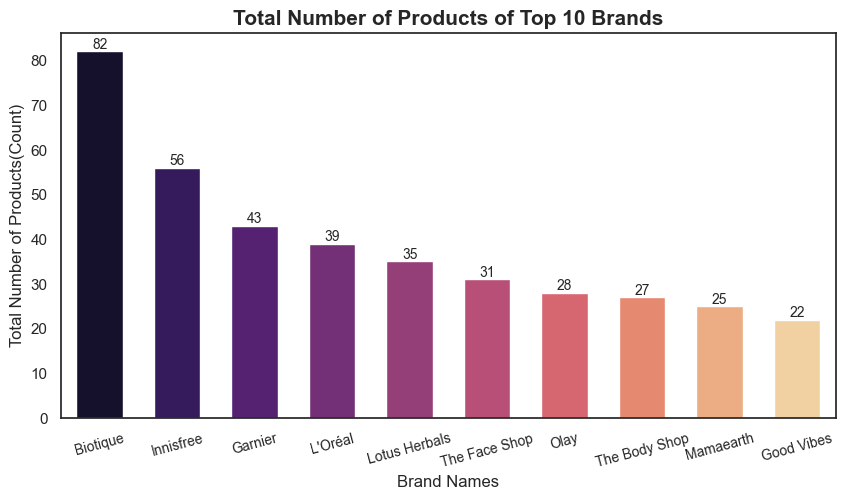

In [10]:
# Bar Graph representing the top 10 brands

plt.figure(figsize=(10, 5))
sns.set(style='white')
ax = sns.barplot(x='Brand', y='Total Number of Products/Count', width = 0.6, data=top_10_brands, palette='magma')
ax.set_title('Total Number of Products of Top 10 Brands', fontsize=15, fontweight='bold')
ax.set_xlabel('Brand Names', fontsize=12, fontweight='medium')
ax.set_ylabel('Total Number of Products(Count)', fontsize=12, fontweight='medium')

for label in ax.containers:
    ax.bar_label(label, fontweight='medium', fontsize=10)
plt.xticks(rotation = 15, fontsize=10)
plt.show()

In [11]:
# Checking product type

pd_type = pd.DataFrame()
pd_type["Total Number of Products/Count"] = skincare["product_type"].value_counts()
pd_type["Percentage(%)"] = skincare["product_type"].value_counts()/skincare.shape[0]*100
pd_type

,Total Number of Products/Count,Percentage(%)
product_type,,
Mask And Peel,283,30.962801
Cleanser,268,29.321663
Face Moisturizer,264,28.884026
Eye Cream,99,10.831510


In [12]:
fig = px.pie(pd_type, values = 'Total Number of Products/Count', color = pd_type.index, names = pd_type.index,
             color_discrete_sequence = ['#003049','#D62828', '#F77F00', '#FCBF49', '#E9D8A6'], hole = 0.5)
fig.update_traces(textposition = 'outside', textfont = dict(color = 'dark blue', size = 15), textinfo = 'label+percent', pull = [0.2,0,0,0], rotation = 10)
fig.add_annotation (text = 'Product Type', showarrow = False, font = dict(size = 12, color='dark blue'))
fig.update_layout(title={'text':'Pie Chart Illustrating the Distribution of Product Types by Percentage', 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [13]:
# Skin Type Suitable For the Product
counts = skincare['skintype'].value_counts()
counts_percentage = skincare['skintype'].value_counts(1)*100
counts_df = pd.DataFrame({'Skin_type':counts.index,'Counts':counts.values,'Percent%':np.round(counts_percentage.values,2)})
counts_df

,Skin_type,Counts,Percent%
0,All,641,70.13
1,Normal,137,14.99
2,Oily,86,9.41
3,Combination,19,2.08
4,Dry,19,2.08
5,Sensitive,12,1.31


In [14]:
# Skin Type
top_7 = counts_df.head(7)
sns.set(style='white')
fig = px.bar(data_frame=top_7, x='Skin_type', y='Counts',
       color='Percent%', color_continuous_scale='Inferno_r',
       width=800, height=600,
       text_auto=True, title=f'Number of Products Suited for Each Skin Type')
fig.update_layout(plot_bgcolor='#FFFCF2', xaxis_tickangle = 15)
fig.show()

In [15]:
# Creating numerical labels of notable_effects
skincare['notable_effects']=skincare['notable_effects'].astype('category')
skincare['labels']=skincare['notable_effects'].cat.codes
skincare.head()

C:\Users\sharv\AppData\Local\Temp\ipykernel_1752\4236124926.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sharv\AppData\Local\Temp\ipykernel_1752\4236124926.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,product_href,product_name,product_type,brand,notable_effects,skintype,price,picture_src,labels
0,https://www.myntra.com/Face Moisturizer/lakme/...,Absolute Perfect Radiance Skin Lightening Day ...,Face Moisturizer,Lakme,General Care,Combination,Rs. 94,"https://assets.myntassets.com/h_720,q_90,w_540...",232
1,https://www.myntra.com/Face Moisturizer/biotiq...,Bio Morning Nectar Flawless Sustainable Skin M...,Face Moisturizer,Biotique,"Uneven Skin Tone,Hydration,Dark Spots",All,Rs. 214,"https://assets.myntassets.com/h_720,q_90,w_540...",392
2,https://www.myntra.com/Face Moisturizer/nivea/...,Unisex Aloe Hydration Skin Cream 100 Ml,Face Moisturizer,Nivea,"Dull Skin,Dryness,General Care",All,Rs. 199,"https://assets.myntassets.com/h_720,q_90,w_540...",148
3,https://www.myntra.com/Face Moisturizer/vi-joh...,Women Set Of 5 Saffron Fairness Cream Advanced,Face Moisturizer,Vi-John,"Softening,Smoothening,Sun Protection",All,Rs. 300,"https://assets.myntassets.com/h_720,q_90,w_540...",361
4,https://www.myntra.com/Face Moisturizer/lakme/...,Peach Milk Soft Creme 150G,Face Moisturizer,Lakme,General Care,All,Rs. 240,"https://assets.myntassets.com/h_720,q_90,w_540...",232


In [16]:
# Skin Type That Suitable For the Product
counts_effect = skincare['notable_effects'].value_counts()
counts_percentage = skincare['notable_effects'].value_counts(1)*100
counts_effect_df = pd.DataFrame({'Notable_Effects':counts_effect.index,'Counts':counts_effect.values,'Percentage(%)':np.round(counts_percentage.values,2)})
counts_effect_df.head(10)

,Notable_Effects,Counts,Percentage(%)
0,General Care,77,8.42
1,Daily Use,39,4.27
2,"Fine Lines,Wrinkles",32,3.50
3,"Acne,Blemishes",30,3.28
4,"Dark Circles,Eye Bags",26,2.84
5,"Fine Lines,Wrinkles,Dark Circles,Eye Bags",19,2.08
6,Dark Circles,12,1.31
7,"Hydration,Deep Nourishment,Daily Use",11,1.20
8,Hydration,10,1.09
9,Dryness,10,1.09


In [17]:
skincare['notable_effects']

0                                   General Care
1          Uneven Skin Tone,Hydration,Dark Spots
2                 Dull Skin,Dryness,General Care
3           Softening,Smoothening,Sun Protection
4                                   General Care
                         ...                    
961                                 Dark Circles
962             Fine Lines,Wrinkles,Dark Circles
963                        Dark Circles,Eye Bags
964    Fine Lines,Wrinkles,Dark Circles,Eye Bags
965                Dark Circles,Eye Bags,Dryness
Name: notable_effects, Length: 914, dtype: category
Categories (397, object): ['Acne,Blemishes', 'Acne,Blemishes,Anti-Pollution', 'Acne,Blemishes,Blackheads,Whiteheads,Dull Skin', 'Acne,Blemishes,Blackheads,Whiteheads,Excess Oil', ..., 'Uneven Skin Tone,Hydration,Deep Nourishment', 'Uneven Skin Tone,Redness,Dark Spots', 'Uneven Skin Tone,Tan Removal,Softening,Smooth..., 'Uneven Skin Tone,Uneven Skin Tone,Excess Oil']

In [18]:
#Top 5 Notable Effects
top_5 = counts_effect_df.head(5)
fig = px.pie(top_5, values = 'Counts', color = 'Notable_Effects', names = 'Notable_Effects',
             color_discrete_sequence = ['#99582A','#F4ACB7', '#FFCCD5', '#FDFCDC', '#C6AC8F'])
fig.update_traces(textposition = 'inside', textfont = dict(color = 'black', size = 15), textinfo = 'percent')
fig.update_layout(title={'text':'Distribution of Notable Effects Across Cosmetic Products', 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

# Data Cleaning

In [19]:
# Remove duplicated rows (14 in total)
skincare.drop_duplicates(inplace=True)

# Re-checking the existence of duplicated rows
skincare.duplicated().sum()

C:\Users\sharv\AppData\Local\Temp\ipykernel_1752\1186413440.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0

# Data Preparation

**Encoding Each Skintypes**

In [20]:
# Separate all skintype into one list, considering comma + space as separators
skintype = skincare['skintype'].str.split(', ').tolist()

# Flatten the list
flat_skintype = [item for sublist in skintype for item in sublist]

# Convert to a set to make unique
set_skintype = set(flat_skintype)

# Back to list
unique_skintype = list(set_skintype)

# Create columns by each unique skintype
skincare = skincare.reindex(skincare.columns.tolist() + unique_skintype, axis=1, fill_value=0)

# For each value inside column, update the dummy
for index, row in skincare.iterrows():
    for val in row.skintype.split(', '):
        if val != 'NA':
            skincare.loc[index, val] = 1

In [21]:
skincare.head(5)

,product_href,product_name,product_type,brand,notable_effects,skintype,price,picture_src,labels,Oily,Sensitive,Combination,Dry,Normal,All
0,https://www.myntra.com/Face Moisturizer/lakme/...,Absolute Perfect Radiance Skin Lightening Day ...,Face Moisturizer,Lakme,General Care,Combination,Rs. 94,"https://assets.myntassets.com/h_720,q_90,w_540...",232,0,0,1,0,0,0
1,https://www.myntra.com/Face Moisturizer/biotiq...,Bio Morning Nectar Flawless Sustainable Skin M...,Face Moisturizer,Biotique,"Uneven Skin Tone,Hydration,Dark Spots",All,Rs. 214,"https://assets.myntassets.com/h_720,q_90,w_540...",392,0,0,0,0,0,1
2,https://www.myntra.com/Face Moisturizer/nivea/...,Unisex Aloe Hydration Skin Cream 100 Ml,Face Moisturizer,Nivea,"Dull Skin,Dryness,General Care",All,Rs. 199,"https://assets.myntassets.com/h_720,q_90,w_540...",148,0,0,0,0,0,1
3,https://www.myntra.com/Face Moisturizer/vi-joh...,Women Set Of 5 Saffron Fairness Cream Advanced,Face Moisturizer,Vi-John,"Softening,Smoothening,Sun Protection",All,Rs. 300,"https://assets.myntassets.com/h_720,q_90,w_540...",361,0,0,0,0,0,1
4,https://www.myntra.com/Face Moisturizer/lakme/...,Peach Milk Soft Creme 150G,Face Moisturizer,Lakme,General Care,All,Rs. 240,"https://assets.myntassets.com/h_720,q_90,w_540...",232,0,0,0,0,0,1


## Exporting the DataFrame as a CSV file

The next stage is to extract the cleaned and prepared dataset into .csv format, to enter the modeling and deployment stage in the website application file

In [22]:
skincare.to_csv("Myntra_export_skincare.csv")

# Modelling

### TF-IDF Vectorizer

The TF-IDF Vectorizer will be used in the recommendation system to find a representation of the important features of each notable_effects category. We will use the tfidfvectorizer() function from the sklearn library.

In [23]:
# Modeling with Content Based Filtering
# Initializing TfidfVectorizer
tf = TfidfVectorizer()

# Perform IDF calculation on 'notable_efects' data
tf.fit(skincare['notable_effects'])

# Mapping array from integer index feature to name feature
tf.get_feature_names_out()

array(['acne', 'ageing', 'anti', 'bags', 'blackheads', 'blemishes',
       'care', 'circles', 'control', 'daily', 'dark', 'deep', 'dryness',
       'dull', 'excess', 'eye', 'fine', 'general', 'hydration',
       'inflammation', 'irregular', 'lightening', 'lines', 'nourishment',
       'oil', 'oily', 'pigmentation', 'pollution', 'pore', 'protection',
       'redness', 'removal', 'sagging', 'scarring', 'skin', 'smoothening',
       'softening', 'spots', 'sun', 'tan', 'textures', 'tightening',
       'tone', 'uneven', 'use', 'whiteheads', 'wrinkles'], dtype=object)

In [24]:
# Doing fit then transformed to matrix form
tfidf_matrix = tf.fit_transform(skincare['notable_effects'])

# Viewing matrix size TF IDF
shape = tfidf_matrix.shape
shape

(914, 47)

In [25]:
# Convert TF-IDF vector in matrix form with todense() function
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.34728123],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [26]:
# Making dataframe to see TF-IDF matrix

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=skincare.product_name
).sample(shape[1], axis=1).sample(10, axis=0)

,removal,excess,pigmentation,blackheads,skin,spots,use,circles,bags,oily,...,deep,daily,wrinkles,fine,lightening,tightening,dull,anti,inflammation,tan
product_name,,,,,,,,,,,,,,,,,,,,,
Unisex Pack Of 2 Omega + Repair Cream,0.0,0.0,0.0,0.000000,0.216360,0.0,0.000000,0.000000,0.000000,0.0,...,0.607194,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
Glamveda Women Whipped Vitamin C Mud Masque 40 Gm,0.0,0.0,0.0,0.000000,0.000000,0.0,0.707107,0.000000,0.000000,0.0,...,0.000000,0.707107,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
Neem Tulsi Face Pack - 100 G,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
Unisex Sustainable Green Tea Set Of Clear Face Mask & Moisturizer,0.0,0.0,0.0,0.481252,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
British Rose Fresh Plumping Face Mask 15 Ml,0.0,0.0,0.0,0.000000,0.303306,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
Set Of Toner & Eye Gel,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.489619,0.545736,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
Men Powerwhite Xl Charcoal Mask,0.0,0.0,0.0,0.000000,0.343799,0.0,0.420241,0.000000,0.000000,0.0,...,0.000000,0.420241,0.000000,0.000000,0.0,0.0,0.413415,0.0,0.0,0.0
Botanicals Bio Saffron Dew Youthful Nourishing Day Sustainable Cream 175 G,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.393535,0.000000,0.362174,0.362174,0.0,0.0,0.000000,0.0,0.0,0.0
Moisture Surge Eye 96-Hour Hydro-Filler Concentrate 15 Ml,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.625912,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


### Cosine Similarity

In [27]:
# Calculating Cosine Similarity on the TF-IDF matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.60934119, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.11567078, ..., 0.14754656, 0.11786997,
        0.1342682 ],
       [0.60934119, 0.11567078, 1.        , ..., 0.        , 0.        ,
        0.21511503],
       ...,
       [0.        , 0.14754656, 0.        , ..., 1.        , 0.79886622,
        0.9100056 ],
       [0.        , 0.11786997, 0.        , ..., 0.79886622, 1.        ,
        0.72697274],
       [0.        , 0.1342682 , 0.21511503, ..., 0.9100056 , 0.72697274,
        1.        ]])

In [28]:
# Creating a dataframe from the cosine_similarity variable with rows and columns in the form of product names
cosine_sim_df = pd.DataFrame(cosine_sim, index=skincare['product_name'], columns=skincare['product_name'])

# See the similarity matrix for each product
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

product_name,Men Acno Fight Pimple Clearing Whitening Cream 45 G,Men Green Tea Face Wash 120Ml,Set Of Lip Balm & Eye Gel,Espresso Coffee Natural Aha Deep Exfoliation Kit With Hyaluronic Acid,Bio Papaya Visibly Ageless Exfoliating Sustainable Face Wash 150 Ml
product_name,,,,,
Daywear Face Moisturiser,0.0,0.000000,0.000000,0.000000,0.000000
Real Nature Green Tea Face Mask 20 Gm,0.0,0.000000,0.000000,0.000000,0.000000
"Bio Fruit Whitening,Depigmentation & Tan Removal Sustainable Face Pack 100 G",0.0,0.279648,0.000000,0.265338,0.645143
Morning Nectar Lotion Pack Of 2,0.0,0.000000,0.147547,0.000000,0.562268
Natural White Light Instant Glowing Fairness Skin Cream With Uv Protection-20Gm,0.0,0.094590,0.000000,0.089749,0.211483
Women Regenerist Advanced Anti-Ageing Revitalising Night Cream 50 G,0.0,0.000000,0.000000,0.000000,0.000000
Women Yellow Sunflower & Lemon Grass Oil Brightening & Anti Blemish Face Pack,1.0,0.545918,0.000000,0.517982,0.000000
Sustainable Rejuvenating And Brightening Ayurvedic Night Cream 50G,0.0,0.000000,0.153293,0.000000,0.000000
Unisex Rose Herbal Face Mask 50 G,0.0,0.000000,0.000000,0.000000,0.000000


### Generating the Recommendation

In [29]:
def skincare_recommendations(product_itemname, similarity_data=cosine_sim_df, items=skincare[['product_name', 'notable_effects']], k=5):

    # Find the index of the top k most similar products to the input product
    # Convert DataFrame to numpy array and use argpartition for efficient sorting
    # Range(start, stop, step)
    index = similarity_data.loc[:,product_itemname].to_numpy().argpartition(
        range(-1, -k, -1))

    # Retrieve data with the greatest similarity from the existing index
    recommended_products = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop a name so that the name of the product we are looking for doesn't appear in the list of recommendations
    recommended_products = recommended_products.drop(product_itemname, errors='ignore')

    return pd.DataFrame(recommended_products).merge(items).head(k)

In [30]:
skincare[skincare.product_name.eq('Absolute Perfect Radiance Skin Lightening Day Creme 15G')].head()

,product_href,product_name,product_type,brand,notable_effects,skintype,price,picture_src,labels,Oily,Sensitive,Combination,Dry,Normal,All
0,https://www.myntra.com/Face Moisturizer/lakme/...,Absolute Perfect Radiance Skin Lightening Day ...,Face Moisturizer,Lakme,General Care,Combination,Rs. 94,"https://assets.myntassets.com/h_720,q_90,w_540...",232,0,0,1,0,0,0


Trying to test the model by getting recommendation

In [31]:
 # Getting skin care product recommendation which are similar to the product
skincare_recommendations("Absolute Perfect Radiance Skin Lightening Day Creme 15G")

,product_name,notable_effects
0,Pack Of 4 Aloe Aqua Face Wash + Makeup Remover...,General Care
1,Men Power White Anti-Dark Cells Fairness Face ...,General Care
2,Gentle & Soft Deep Pore Cleanser,General Care
3,Skin Naturals Micellar Cleansing Water 125 Ml,General Care
4,Hydra Cleanser - 120 Ml,General Care
